In [1]:
import pandas as pd
from scipy.stats import zscore
import re
import seaborn as sns
import matplotlib.pyplot as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
the_mri_tp = 2
the_mri_bin_width = 5
the_pet_bin_width = 0.1

rootdir = '/Users/shuang/Documents/Proj_Radiomics/Data/her2'
im_dir = '{}/her2_Analysis/PETMRI/PETbinwidth{:.1f}_MRItp{}_binwidth{}'.format(rootdir,the_pet_bin_width, the_mri_tp, the_mri_bin_width)
fname = '{}/data_all.csv'.format(im_dir)
df_data = pd.read_csv(fname)

pat = re.compile('texture_|FOstats_|ShapeSize_')
feat_names = [ss for ss in df_data.columns.tolist() if pat.match(ss)]
feat_tag = 'pet_mr_radiomics'

# scale the features to z-score
df_data[feat_names] = df_data[feat_names].apply(zscore)

df_yr = range(1,6,1)
outcome_name_lst = ['DF_{}yr'.format(yy) for yy in df_yr]

In [3]:
# explore correlation between PET and MR features
sns.set(style="white")

from string import ascii_letters
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

In [4]:
the_df = df_data[feat_names]
the_df.reset_index(inplace=True)

# label the data accordingly to evaluate correlation between PET vs MR features
df_melt = pd.melt(the_df, id_vars=['index'], value_vars=feat_names)

# select PET and MR specific

df_melt['feat_name'] = df_melt['variable'].map(lambda x: re.search('(.+)_(\w+)',x).group(1) if re.search('(.+)_(\w+)',x) else np.nan)
df_melt['modality'] = df_melt['variable'].map(lambda x: re.search('(.+)_(\w+)',x).group(2) if re.search('(.+)_(\w+)',x) else np.nan)

df_mri = df_melt.ix[df_melt['modality'] == 'mri', :]
df_mri = df_mri.pivot(index='index', columns='feat_name', values='value')
radiomic_feats = df_mri.columns.tolist()
# print(df_mri.columns)

# df_pet = df_melt.ix[df_melt['modality'] == 'pet', :]
# df_pet = df_pet.pivot(index='index', columns='feat_name', values='value')
# df_pet = df_pet.ix[:, radiomic_feats]
# print(df_pet.columns)


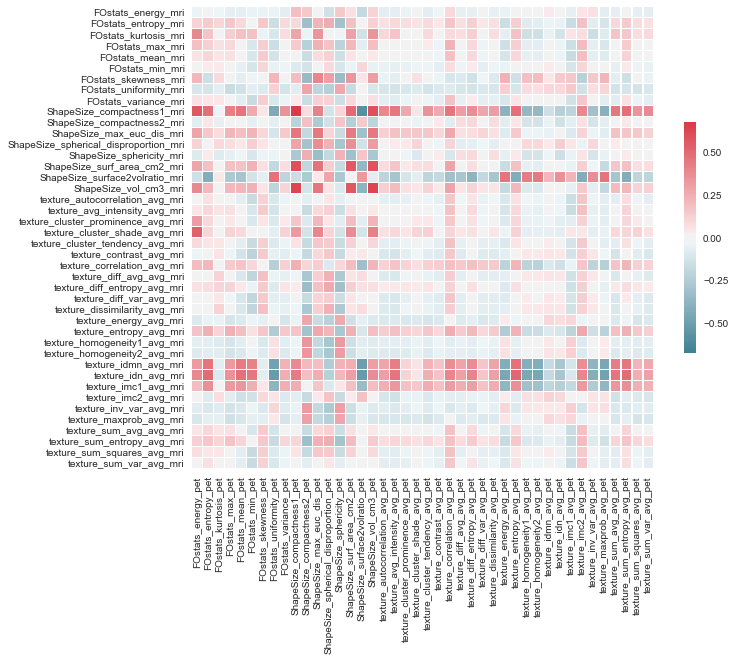

In [11]:
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#TODO: maybe select a subset of df.corr() to plot for radiomics between PET and MR instead of doing df_mri.corrwith(df_pet)
rf_mri = ['{}_mri'.format(s) for s in radiomic_feats]
rf_pet = ['{}_pet'.format(s) for s in radiomic_feats]
df_oi = df_data[feat_names]
df_oi_corr = df_oi.corr()
corr_oi = df_oi_corr.ix[rf_mri, rf_pet]

# update feature name
rf_mri_new = 

plt.figure(figsize=(11,8.5))
sns.heatmap(corr_oi, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
# g.set_xlabel('Disease-free duration', {'weight': 'bold', 'size': 13})
# g.set_ylabel('Classification algorithm', {'weight': 'bold', 'size': 13})
# g.set_xticklabels(['1 year', '2 years', '3 years', '4 years', '5 years'], {'weight': 'bold', 'size': 11})
# g.set_yticklabels(g.get_yticklabels(), {'weight': 'bold', 'size': 11})
# fig_name = '{}/CLF_output_all_Heatmap_boostrapCI.pdf'.format(data_dir)
# # plt.tight_layout()
# plt.savefig(fig_name, bbox_inches='tight')


In [31]:
df_mri.columns

Index(['index', 'variable', 'value', 'feat_name', 'modality'], dtype='object')